# 01wk-02: 캐글자료 다운로드

최규빈  
2023-09-04

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/home/cgb2/Dropbox/07_lectures/2023-09-MP2023/posts"

In [2]:
!kaggle competitions download -c bike-sharing-demand

100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 366kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 366kB/s]

In [11]:
!unzip bike-sharing-demand.zip -d ./data

Archive:  bike-sharing-demand.zip
  inflating: ./data/sampleSubmission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        

In [12]:
!rm bike-sharing-demand.zip

In [13]:
!ls ./data 

sampleSubmission.csv  test.csv  train.csv

In [3]:
import pandas as pd

In [4]:
pd.read_csv('./data/train.csv')

In [5]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [25]:
train_data = TabularDataset('./data/train.csv').drop(['casual','registered'],axis=1)
test_data = TabularDataset('./data/test.csv')

Loaded data from: ./data/train.csv | Columns = 12 / 12 | Rows = 10886 -> 10886
Loaded data from: ./data/test.csv | Columns = 9 / 9 | Rows = 6493 -> 6493

In [26]:
train_data

In [27]:
test_data

In [33]:
predictor = TabularPredictor(label='count',problem_type='regression',path='./output')
predictor.fit(train_data)

Beginning AutoGluon training ...
AutoGluon will save models to "./output/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   317.15 GB / 490.57 GB (64.6%)
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
    Available Memory:                    124420.04 MB
    Train Data (Original)  Memory Usage: 1.52 MB (0.0% of available memory)
    Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
    Stage 1 Generators:
        Fitting AsTypeFeatureGenerator...
            Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
    Stage 2 Generators:
        Fitting FillNaFeatureGenerator...
 

[1000]  valid_set's rmse: 136.065

In [34]:
# 테스트 데이터에 대한 예측
predictions = predictor.predict(train_data)

In [35]:
predictor.evaluate(train_data, silent=True)

In [37]:
predictor.leaderboard(train_data, silent=True)

In [50]:
import matplotlib.pyplot as plt 
import numpy as np

In [52]:
np.sqrt(np.mean((train_data['count'] - predictions)**2))

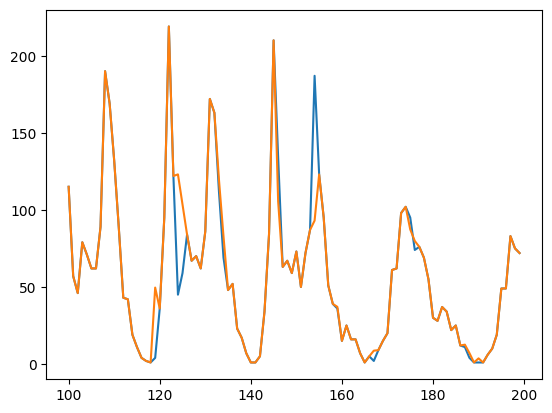

In [46]:
plt.plot(train_data['count'][100:200])
plt.plot(predictions[100:200])